In [395]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

In [396]:
data = pd.read_csv('../data/processed/train_normalized.csv')

data.head()

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,...,Mental_Health_Poor,Sleep_Excessive,Sleep_Insomnia,Sleep_Normal,Education_High School,Education_Postgraduate,Education_Undergraduate,Income_High,Income_Low,Income_Medium
0,0.275255,1.034833,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,-1.685348,-1.036748,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.468750,0.538701,1.207329,0.246577,-0.447021,-0.681807,-0.988497,0.531535,-1.578733,1.494861,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.360965,-1.772009,-1.067962,-1.221225,0.929241,-1.033680,-1.077411,0.526607,-0.648420,1.454120,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.052464,-1.252553,0.785321,-1.363735,0.592362,0.569177,0.187074,2.281748,-0.737829,-0.302987,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.520099,0.108355,0.085250,0.465336,1.024787,-1.121453,-0.799873,0.381138,-0.922682,-0.556389,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [397]:
column_names = data.columns.tolist()
print(column_names)

['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose', 'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress', 'Pollution', 'Sun_Exposure', 'Age', 'Systolic_BP', 'Diastolic_BP', 'Gender_Female', 'Gender_Male', 'Physical_Activity_High', 'Physical_Activity_Low', 'Physical_Activity_Moderate', 'Smoking_Current', 'Smoking_Former', 'Smoking_Never', 'Alcohol_Frequent', 'Alcohol_Occasional', 'Diet_Balanced', 'Diet_High-fat', 'Diet_Low-carb', 'Diet_Vegetarian', 'Chronic_Diseases_Diabetes', 'Chronic_Diseases_Heart Disease', 'Chronic_Diseases_Hypertension', 'Medication_Occasional', 'Medication_Regular', 'Family_History_Diabetes', 'Family_History_Heart Disease', 'Family_History_Hypertension', 'Mental_Health_Excellent', 'Mental_Health_Fair', 'Mental_Health_Good', 'Mental_Health_Poor', 'Sleep_Excessive', 'Sleep_Insomnia', 'Sleep_Normal', 'Education_High School', 'Education_Postgraduate', 'Education_Undergraduate', 'Income_High', 'Income_Low', 'Income_Medium']


In [398]:
# Loại bỏ 'ages' khỏi danh sách column_names nếu nó tồn tại
columns_excluding_ages = [col for col in column_names if col != 'Age']

# In danh sách các cột trừ 'ages'
print(columns_excluding_ages)


['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose', 'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress', 'Pollution', 'Sun_Exposure', 'Systolic_BP', 'Diastolic_BP', 'Gender_Female', 'Gender_Male', 'Physical_Activity_High', 'Physical_Activity_Low', 'Physical_Activity_Moderate', 'Smoking_Current', 'Smoking_Former', 'Smoking_Never', 'Alcohol_Frequent', 'Alcohol_Occasional', 'Diet_Balanced', 'Diet_High-fat', 'Diet_Low-carb', 'Diet_Vegetarian', 'Chronic_Diseases_Diabetes', 'Chronic_Diseases_Heart Disease', 'Chronic_Diseases_Hypertension', 'Medication_Occasional', 'Medication_Regular', 'Family_History_Diabetes', 'Family_History_Heart Disease', 'Family_History_Hypertension', 'Mental_Health_Excellent', 'Mental_Health_Fair', 'Mental_Health_Good', 'Mental_Health_Poor', 'Sleep_Excessive', 'Sleep_Insomnia', 'Sleep_Normal', 'Education_High School', 'Education_Postgraduate', 'Education_Undergraduate', 'Income_High', 'Income_Low', 'Income_Medium']


In [399]:
# features = [
#     'Cholesterol',
#     'Blood_Glucose',
#     'Bone_Density',
#     'Vision',
#     'Hearing',
#     'Smoking_Current',
#     'Smoking_Former',
#     'Smoking_Never',
#     'Cognitive_Function',
#     'Systolic_BP',
#     'Diastolic_BP'
# ]

In [400]:
features = columns_excluding_ages

In [401]:
data[features+ ['Age']].head(20)

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,...,Sleep_Excessive,Sleep_Insomnia,Sleep_Normal,Education_High School,Education_Postgraduate,Education_Undergraduate,Income_High,Income_Low,Income_Medium,Age
0,0.275255,1.034833,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,-1.685348,-1.036748,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.726825
1,0.468750,0.538701,1.207329,0.246577,-0.447021,-0.681807,-0.988497,0.531535,-1.578733,1.494861,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.143345
2,-1.360965,-1.772009,-1.067962,-1.221225,0.929241,-1.033680,-1.077411,0.526607,-0.648420,1.454120,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.802982
3,0.052464,-1.252553,0.785321,-1.363735,0.592362,0.569177,0.187074,2.281748,-0.737829,-0.302987,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.072238
4,-0.520099,0.108355,0.085250,0.465336,1.024787,-1.121453,-0.799873,0.381138,-0.922682,-0.556389,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.240592
5,0.678126,0.540941,-1.440256,0.113884,-1.411715,1.135244,0.916343,-1.333050,0.635625,-0.904545,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.190574
6,1.075841,1.060361,0.502091,0.361469,0.182360,-0.799449,-1.309503,1.140440,-1.345549,1.113765,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.094722
7,-0.063275,-0.455930,-0.471803,-0.453644,-0.540404,1.547325,1.157597,-0.522233,1.647002,-1.119448,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.336444
8,-0.435230,0.141645,-1.215229,0.442074,0.568970,0.260408,0.149447,0.494549,0.070987,-1.580236,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.169485
9,-0.403748,-0.626722,1.409975,-0.434325,0.186716,-1.377316,-1.309503,1.296552,-0.514182,0.695166,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.143345


<Axes: >

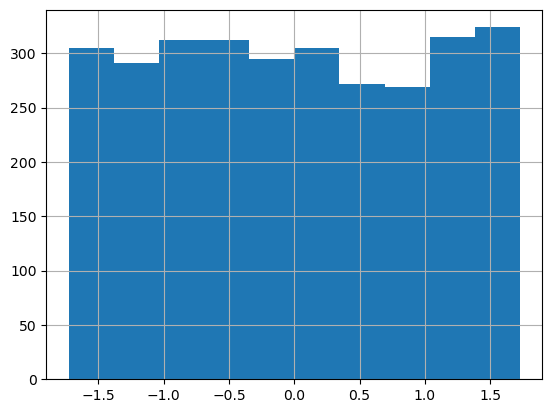

In [402]:
data['Age'].hist()

### Chia tập dữ liệu 70:30

In [403]:
X = data[features]
y = data['Age']

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=28)

### chia khoảng cho tuổi

In [405]:
y_train = pd.cut(y_train, bins=5, labels=False)
y_test = pd.cut(y_test, bins=5, labels=False)

### huấn luyện mô hình

In [406]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [407]:
y_pred = model.predict(X_test)

### độ chính xác

In [408]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6533333333333333
Precision: 0.6629173908664943
Recall: 0.6533333333333333
F1 Score: 0.6360638468294716


### vẽ cây quyết định

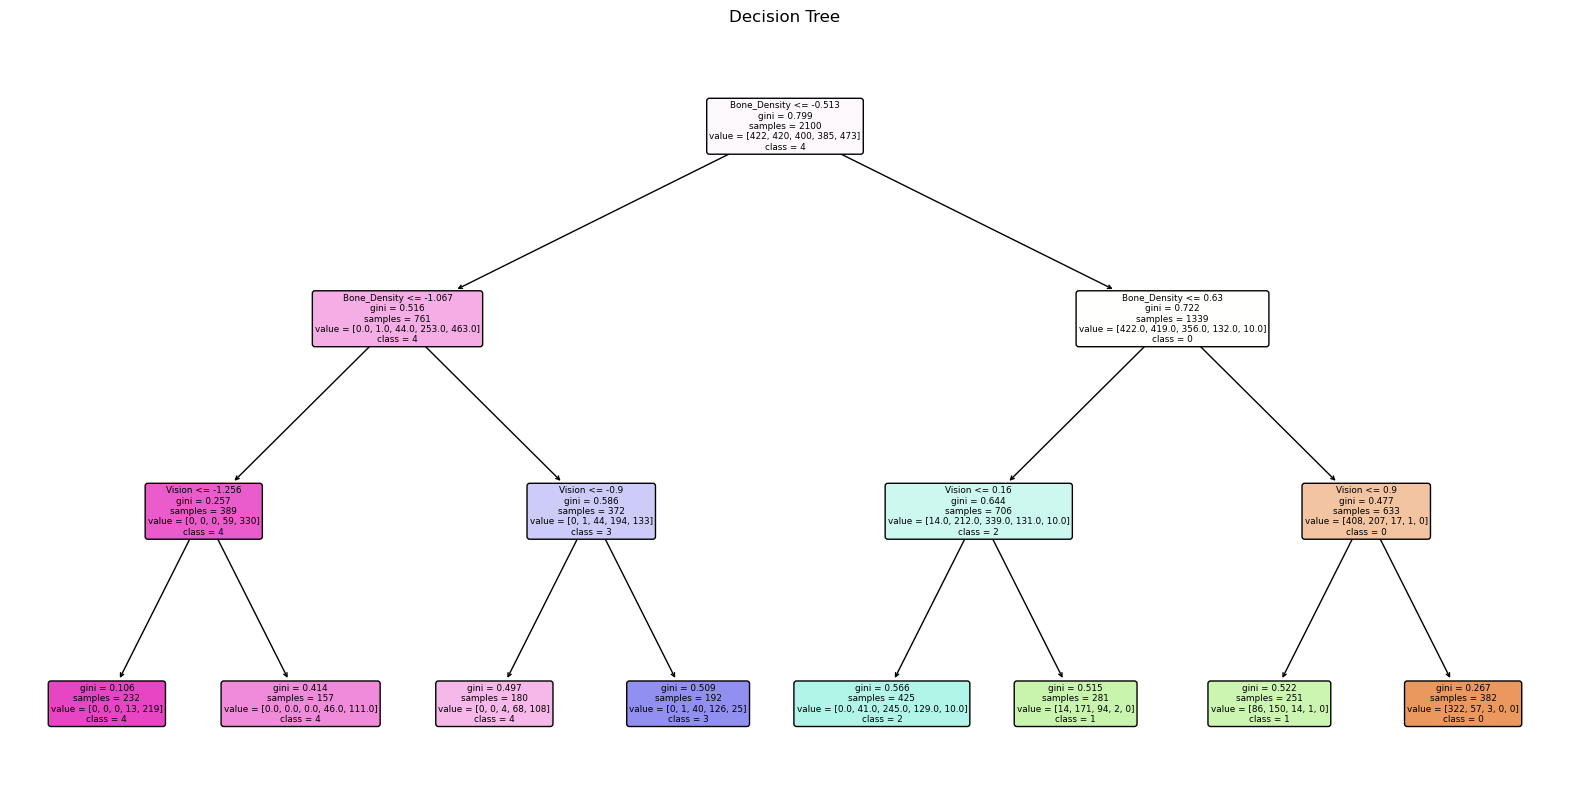

In [409]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=features,
    class_names=[str(cls) for cls in range(5)],
    filled=True,
    rounded=True
)
plt.title("Decision Tree")
plt.show()

### Ma trận nhầm lẫn

[[133  41   0   0   0]
 [ 38 137  29   0   0]
 [  0  68 119  10   3]
 [  0   2  56  42  56]
 [  0   0   3   6 157]]


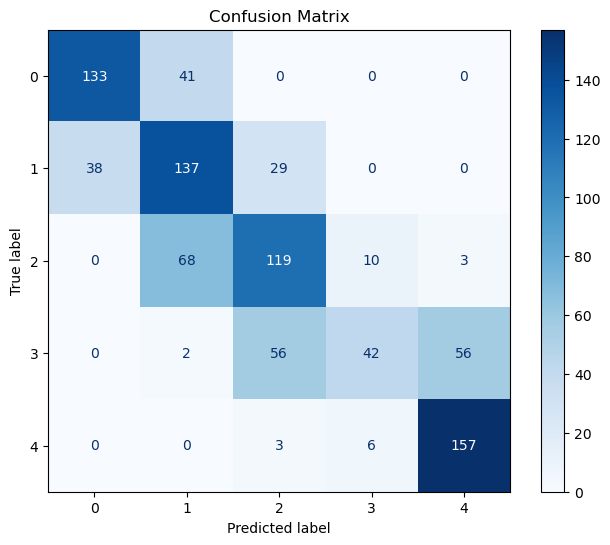

In [410]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(cls) for cls in range(5)])
print(cm)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

### Xem độ quan trọng của các features


Feature Importances:
                           Feature  Importance
5                     Bone_Density    0.770316
6                           Vision    0.229684
0                           Height    0.000000
37              Mental_Health_Fair    0.000000
28       Chronic_Diseases_Diabetes    0.000000
29  Chronic_Diseases_Heart Disease    0.000000
30   Chronic_Diseases_Hypertension    0.000000
31           Medication_Occasional    0.000000
32              Medication_Regular    0.000000
33         Family_History_Diabetes    0.000000
34    Family_History_Heart Disease    0.000000
35     Family_History_Hypertension    0.000000
36         Mental_Health_Excellent    0.000000
39              Mental_Health_Poor    0.000000
38              Mental_Health_Good    0.000000
26                   Diet_Low-carb    0.000000
40                 Sleep_Excessive    0.000000
41                  Sleep_Insomnia    0.000000
42                    Sleep_Normal    0.000000
43           Education_High School    

C:\Users\Illya\AppData\Local\Temp\ipykernel_10944\666565990.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


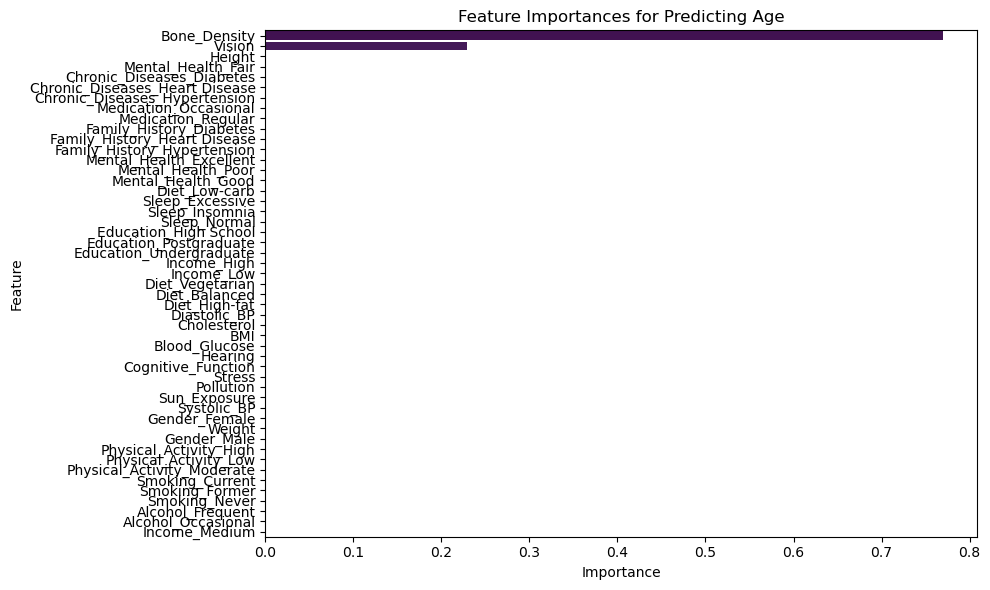

In [411]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances for Predicting Age")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [412]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

### Tạo scorer cho từng metric

In [413]:
mse_scorer = 'neg_mean_squared_error'
mae_scorer = 'neg_mean_absolute_error'
r2_scorer = 'r2'

### Đánh giá mô hình bằng cross_val_score

In [414]:
mse_scores = cross_val_score(model, X, pd.cut(y, bins=5, labels=False), cv=kf, scoring=mse_scorer)
mae_scores = cross_val_score(model, X, pd.cut(y, bins=5, labels=False), cv=kf, scoring=mae_scorer)
r2_scores = cross_val_score(model, X, pd.cut(y, bins=5, labels=False), cv=kf, scoring=r2_scorer)

In [415]:
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)
mae_scores = -mae_scores

In [416]:
# Tạo DataFrame cho scores
mse_scores_df = pd.DataFrame(mse_scores, columns=['MSE'])
rmse_scores_df = pd.DataFrame(rmse_scores, columns=['RMSE'])
mae_scores_df = pd.DataFrame(mae_scores, columns=['MAE'])
r2_scores_df = pd.DataFrame(r2_scores, columns=['R2'])

# Kết hợp các score vào một DataFrame
score = pd.concat([mse_scores_df, rmse_scores_df, mae_scores_df, r2_scores_df], axis=1)

# Hiển thị các score
print(score)

# Thống kê các score
print("Summary statistics:")
print(score.describe())


        MSE      RMSE       MAE        R2
0  0.408333  0.639010  0.381667  0.791758
1  0.371667  0.609645  0.351667  0.826292
2  0.380000  0.616441  0.356667  0.806297
3  0.358333  0.598609  0.331667  0.835172
4  0.363333  0.602771  0.346667  0.810461
Summary statistics:
            MSE      RMSE       MAE        R2
count  5.000000  5.000000  5.000000  5.000000
mean   0.376333  0.613295  0.353667  0.813996
std    0.019699  0.015897  0.018235  0.017073
min    0.358333  0.598609  0.331667  0.791758
25%    0.363333  0.602771  0.346667  0.806297
50%    0.371667  0.609645  0.351667  0.810461
75%    0.380000  0.616441  0.356667  0.826292
max    0.408333  0.639010  0.381667  0.835172


In [417]:
print(f"Average MSE across {k} folds: {mse_scores.mean():.4f} +- {mse_scores.std():.4f}")
print(f"Average RMSE across {k} folds: {rmse_scores.mean():.4f} +- {rmse_scores.std():.4f}")
print(f"Average MAE across {k} folds: {mae_scores.mean():.4f} +- {mae_scores.std():.4f}")
print(f"Average R2 across {k} folds: {r2_scores.mean():.4f} +- {r2_scores.std():.4f}") 

Average MSE across 5 folds: 0.3763 +- 0.0176
Average RMSE across 5 folds: 0.6133 +- 0.0142
Average MAE across 5 folds: 0.3537 +- 0.0163
Average R2 across 5 folds: 0.8140 +- 0.0153


### Nhận xét:
- MSE đo lường mức độ sai lệch giữa dự đoán và thực tế, càng về gần 0 thì càng chính xác. Tại đây 0.3763 tạm ổn
- RMSE là căn bậc 2 của MSE. Ta thấy độ lệch chuẩn nhỏ 0.0142 suy ra kết quả ổn định
- MAE là mức độ sai số trung bình tuyệt đối. giá trị thấp cho thấy mô hình dự đoán khá hiệu quả
- R2 là chỉ số đánh giá độ phù hợp của mô hình. Với giá trị mục tiêu là 1 được xem là chuẩn thì giá trị 0.814 cho thấy mô hình có khả năng giải thích 81.4% sự biến thiên trong dữ liệu đầu ra, thể hiện sự hiệu quả